In [13]:
# Required Libraries
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Load dataset
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [15]:
df.shape

(5171, 4)

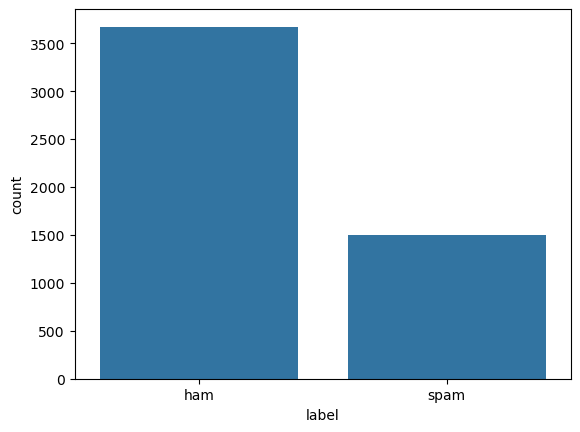

In [16]:
sns.countplot(x='label', data=df)  # Pass 'data' explicitly
plt.show()

In [17]:
# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)


In [18]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [w for w in words if w not in stop_words]  # Remove stopwords
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]  # Stemming
    return " ".join(words)


In [19]:
# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

In [20]:
# Labels (already encoded in label_num)
X_raw = df['clean_text']
y = df['label_num']

In [21]:
# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_raw)

In [22]:
# Model Training
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and Train Model
model = MultinomialNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [23]:
#Model Evaluation
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035

Confusion Matrix:
 [[742   0]
 [ 77 216]]


In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.9256038647342996
